In [132]:
#Lets import required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
train = pd.read_csv(r'E:\Study\Data Challenges\AV\Loan Predicton\train.csv')
test = pd.read_csv(r'E:\Study\Data Challenges\AV\Loan Predicton\test.csv')

In [134]:
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [135]:
train.isnull().sum()
# We can see from the output that there are missing values in case of gender, married, dependents,self_employed,LoanAmount, Loan_Amount_term,Credit_history

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [136]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [137]:
print(train.Self_Employed.value_counts(dropna=False))
print(test.Self_Employed.value_counts(dropna=False))


train.Self_Employed.fillna('Unknown',inplace = True)
test.Self_Employed.fillna('Unknown',inplace = True)


No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64


In [138]:
print(train.Gender.value_counts(dropna=False))
print(test.Gender.value_counts(dropna=False))

train.Gender.fillna('Unknown',inplace = True)
test.Gender.fillna('Unknown',inplace = True)



Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Male      286
Female     70
NaN        11
Name: Gender, dtype: int64


In [139]:
print(train.Married.value_counts(dropna=False))
print(test.Married.value_counts(dropna=False))

train.Married.fillna('Unknown',inplace = True)
test.Married.fillna('Unknown',inplace = True)


Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64


In [140]:
print(train.Dependents.value_counts(dropna=False))
print(test.Dependents.value_counts(dropna=False))

train.Dependents.fillna('Unknown',inplace = True)
test.Dependents.fillna('Unknown',inplace = True)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64


In [141]:
print(train.Loan_Amount_Term.value_counts(dropna=False))
print(test.Loan_Amount_Term.value_counts(dropna=False))

train.Loan_Amount_Term.fillna(360,inplace = True)
test.Loan_Amount_Term.fillna(360,inplace = True)

 360    512
 180     44
 480     15
NaN      14
 300     13
 240      4
 84       4
 120      3
 60       2
 36       2
 12       1
Name: Loan_Amount_Term, dtype: int64
 360    311
 180     22
 480      8
 300      7
NaN       6
 240      4
 84       3
 350      1
 120      1
 60       1
 36       1
 12       1
 6        1
Name: Loan_Amount_Term, dtype: int64


In [142]:
print(train.Credit_History.value_counts(dropna=False))
print(test.Credit_History.value_counts(dropna=False))

train.Credit_History.fillna(2,inplace = True)
test.Credit_History.fillna(2,inplace = True)

 1     475
 0      89
NaN     50
Name: Credit_History, dtype: int64
 1     279
 0      59
NaN     29
Name: Credit_History, dtype: int64


In [143]:
import matplotlib.pyplot as plt 
%matplotlib inline

(array([  46.,  160.,  100.,   37.,    8.,    6.,    2.,    1.,    1.,    1.]),
 array([  28. ,   80.2,  132.4,  184.6,  236.8,  289. ,  341.2,  393.4,
         445.6,  497.8,  550. ]),
 <a list of 1 Patch objects>)

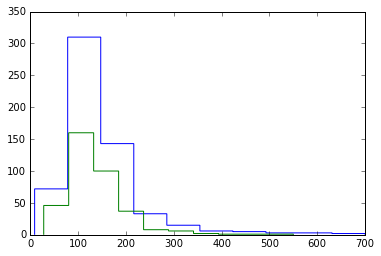

In [144]:
plt.hist(x=train.LoanAmount.dropna(),histtype='step')
plt.hist(x=test.LoanAmount.dropna(),histtype='step')

In [145]:
train.LoanAmount.fillna(train.LoanAmount.mean(),inplace = True)
test.LoanAmount.fillna(train.LoanAmount.mean(),inplace = True)

train['total_income'] = train.ApplicantIncome + train.CoapplicantIncome
test['total_income'] = test.ApplicantIncome + test.CoapplicantIncome

In [146]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                if output[col].dtypes == 'object' :
                    output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                if output[colname].dtypes == 'object' :
                    output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [147]:
#Label encoding
train_fin = MultiColumnLabelEncoder(columns = ['Gender','Married','Dependents','Education',
                                               'Self_Employed','Property_Area','Credit_History','Loan_Status','total_income']).fit_transform(train)
test_fin = MultiColumnLabelEncoder(columns = ['Gender','Married','Dependents','Education',
                                              'Self_Employed','Property_Area','Credit_History','total_income']).fit_transform(test)

In [150]:
tes_loan_id = test_fin.Loan_ID
col_names = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 
             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 
             'Credit_History', 'Property_Area','total_income']
x = train_fin[col_names]
y = train_fin.Loan_Status
x_test = test_fin[col_names]

In [151]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,1,0,0,0,0,5849,0,146.412162,360,1,2,5849
1,1,2,1,0,0,4583,1508,128.000000,360,1,0,6091
2,1,2,0,0,2,3000,0,66.000000,360,1,2,3000
3,1,2,0,1,0,2583,2358,120.000000,360,1,2,4941
4,1,0,0,0,0,6000,0,141.000000,360,1,2,6000


In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [152]:
knn = KNeighborsClassifier()
grid_knn_prarm = {"n_neighbors": list(range(5,40)), "weights":['uniform','distance']}
grid_knn = GridSearchCV(knn,grid_knn_param,cv = 10, n_jobs = -1 , scoring= 'accuracy')
grid_knn.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

{}

In [159]:
RF = RandomForestClassifier()
grid_rf_param  = { "n_estimators" : list(range(100,1000,50)) ,
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"]}
grid_rf = RandomizedSearchCV(RF,grid_rf_param,cv = 10, n_jobs = -1 , scoring= 'accuracy')
grid_rf.fit(x,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [10, 110, 210, 310, 410, 510, 610, 710, 810, 910], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [161]:
print(grid_rf.best_estimator_)
print(grid_rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=610, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.793159609121


In [162]:
RF = RandomForestClassifier()
grid_rf_param  = { "n_estimators" : list(range(100,1000,50)) ,
                  "bootstrap": [True, False],
                  "min_samples_split": [1, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"]}
grid_rf = GridSearchCV(RF,grid_rf_param,cv = 10, n_jobs = -1 , scoring= 'accuracy')
grid_rf.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950], 'min_samples_split': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [163]:
print(grid_rf.best_estimator_)
print(grid_rf.best_score_)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.812703583062


In [179]:
pred = []
for i in grid_rf.predict(test_fin[col_names]):
    if i==1:
        pred.append("Y")
    else:
        pred.append("N")


In [180]:
pd.DataFrame({'Loan_ID':tes_loan_id,'Loan_Status':pred}).to_csv(r'E:\Study\Data Challenges\AV\submission2.csv')